# 第5章 これって普通なこと？特殊なこと？：正規分布

## 16 データのばらつきを数値で表す

リスト5.1

In [1]:
import pandas as pd
data = {
    "ID": [0,1,2,3,4,5,6,7,8,9],
    "A" : [59, 24, 62, 48, 58, 19, 32, 88, 47, 63],
    "B" : [49, 50, 49, 54, 45, 52, 56, 48, 45, 52]
}
df = pd.DataFrame(data)
print(df["A"].mean())
print(df["B"].mean())

50.0
50.0


リスト5.2

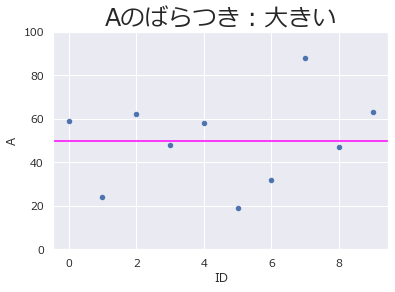

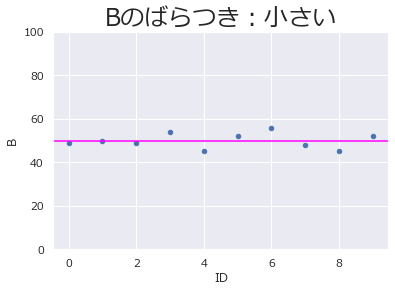

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Meiryo","Yu Gothic", "Hiragino Maru Gothic Pro"])

df.plot.scatter(x="ID", y="A", color="b", ylim=(0,100))
plt.axhline(y=50, c="Magenta")
plt.title("Aのばらつき：大きい", fontsize=24)
plt.show()

df.plot.scatter(x="ID", y="B", color="b", ylim=(0,100))
plt.axhline(y=50, c="Magenta")
plt.title("Bのばらつき：小さい", fontsize=24)
plt.show()

リスト5.3

In [3]:
print(df.var())

ID      9.166667
A     430.666667
B      12.888889
dtype: float64


リスト5.4

In [4]:
print(df.std())

ID     3.02765
A     20.75251
B      3.59011
dtype: float64


### ある範囲にどのくらいデータがあるかがわかる

リスト5.5

In [5]:
meanA = df["A"].mean()
stdA = df["A"].std()
print(meanA - stdA, "〜", meanA + stdA)

29.247490111635493 〜 70.7525098883645


リスト5.6

In [6]:
meanB = df["B"].mean()
stdB = df["B"].std()
print(meanB - stdB, "〜", meanB + stdB)

46.409890128577 〜 53.590109871423


リスト5.7

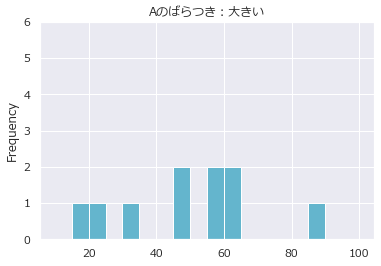

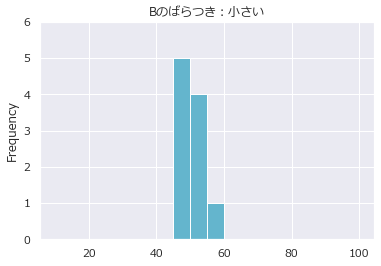

In [7]:
bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

df["A"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.title("Aのばらつき：大きい")
plt.show()

df["B"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.title("Bのばらつき：小さい")
plt.show()

リスト5.8

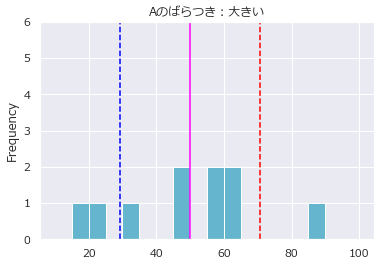

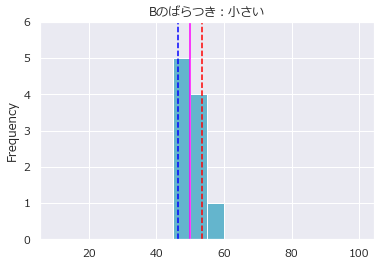

In [8]:
df["A"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.axvline(x=meanA, color="magenta")
plt.axvline(x=meanA - stdA, color="blue", linestyle="--")
plt.axvline(x=meanA + stdA, color="red", linestyle="--")
plt.title("Aのばらつき：大きい")
plt.show()

df["B"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.axvline(x=meanB, color="magenta")
plt.axvline(x=meanB - stdB, color="blue", linestyle="--")
plt.axvline(x=meanB + stdB, color="red", linestyle="--")
plt.title("Bのばらつき：小さい")
plt.show()

# 17 自然なばらつき

### ゴルトンボードをシミュレート

リスト5.9

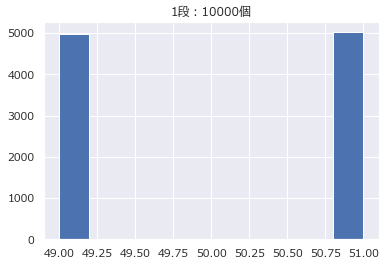

In [9]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Meiryo","Yu Gothic", "Hiragino Maru Gothic Pro"])

# ゴルトンボード表示関数：段数、玉数を指定する
def galton(steps, count) :
   # 玉が落ちた位置を入れる空のリストを用意する
    ans = []
    # 指定された玉数だけくり返す
    for i in range(count):
        # 玉を落とす最初の位置を50にする
        val = 50
        # 指定された段数だけくり返す
        for j in range(steps):
            # 0か1のランダムで、0なら-1、1なら+1
            if random.randint(0, 1) == 0:
                val = val -1
            else :
                val = val + 1
        # 最終的に玉が落ちた位置をリストに追加する
        ans.append(val)
    
    # 落下した結果のリストをデータフレームにして
    df = pd.DataFrame(ans)
    # 0列目（落とした結果の列）をヒストグラムで表示
    df[0].plot.hist()
    plt.title(str(steps)+"段："+str(count)+"個")
    plt.ylabel("")
    plt.show()

galton(1, 10000)

リスト5.10

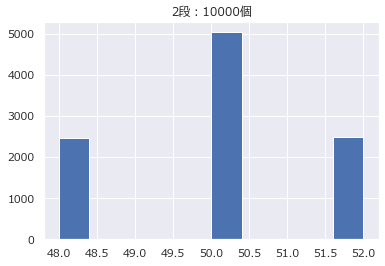

In [10]:
galton(2, 10000)

リスト5.11

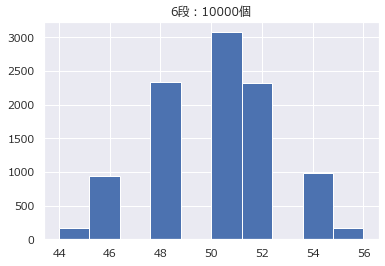

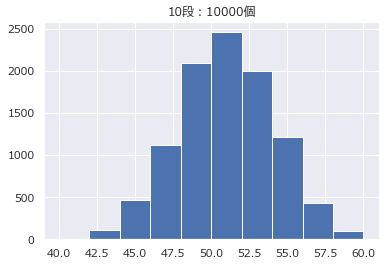

In [11]:
galton(6, 10000)
galton(10, 10000)

リスト5.12

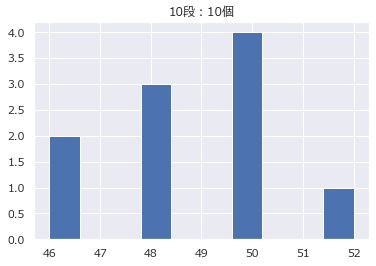

In [12]:
galton(10, 10) 

## 18 この値は普通なこと？珍しいこと？

リスト5.13

In [13]:
from scipy.stats import norm

mean = 166.8
std = 5.8
value = 160.0

cdf = norm.cdf(x=value, loc=mean, scale=std)
print(value,"は、下から", cdf*100,"%")

160.0 は、下から 12.051548220947089 %


リスト5.14

In [14]:
mean = 166.8
std = 5.8
value = 178.0

cdf = norm.cdf(x=value, loc=mean, scale=std)
print(value,"は、上から", (1-cdf)*100,"%")

178.0 は、上から 2.6739394108996173 %


リスト5.15

In [15]:
mean = 166.8
std = 5.8
per = 0.20

ppf = norm.ppf(q=per, loc=mean, scale=std)
print("下から", per * 100, "%の値は、", ppf, "です。")

下から 20.0 %の値は、 161.9185968452771 です。


リスト5.16

In [16]:
mean = 166.8
std = 5.8
per = 0.01

ppf = norm.ppf(q=(1-per), loc=mean, scale=std)
print("上から", per * 100, "%の値は、", ppf, "です。")

上から 1.0 %の値は、 180.2928176694369 です。


### 違うばらつきのデータでの比較

リスト5.17

In [17]:
from scipy.stats import norm

scoreM=60
meanM = 50
stdM = 5

scoreE=80
meanE = 70
stdE = 8

cdf = norm.cdf(x=scoreM, loc=meanM, scale=stdM)
print("数学の", scoreM, "点は、上から", (1-cdf)*100, "%")

cdf = norm.cdf(x=scoreE, loc=meanE, scale=stdE)
print("英語の", scoreE, "点は、上から", (1-cdf)*100, "%")

数学の 60 点は、上から 2.275013194817921 %
英語の 80 点は、上から 10.564977366685536 %


## 19 このデータは自然なバラつき？

リスト5.18

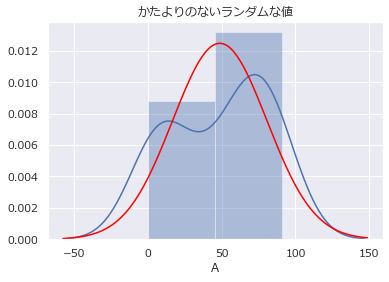

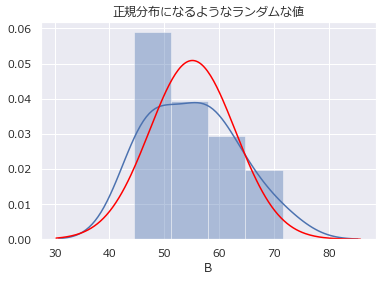

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
sns.set(font=["Meiryo","Yu Gothic", "Hiragino Maru Gothic Pro"])

df = pd.DataFrame({
    "A" : np.random.randint(0, 100, 15),
    "B" : np.random.normal(50, 10, 15)
})

sns.distplot(df["A"], fit=norm, fit_kws={"color":"red"})
plt.title("かたよりのないランダムな値")
plt.show()

sns.distplot(df["B"], fit=norm, fit_kws={"color":"red"})
plt.title("正規分布になるようなランダムな値")
plt.show()

リスト5.19

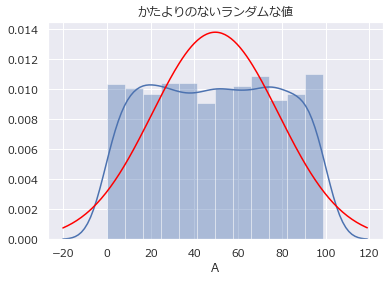

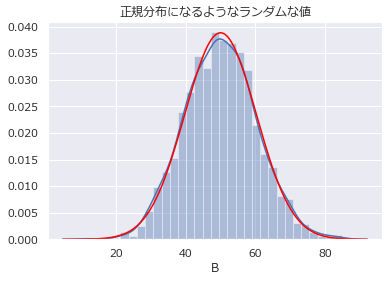

In [19]:
df = pd.DataFrame({
    "A" : np.random.randint(0, 100, 1500),
    "B" : np.random.normal(50, 10, 1500)
})

sns.distplot(df["A"], fit=norm, fit_kws={'color':'red'})
plt.title("かたよりのないランダムな値")
plt.show()

sns.distplot(df["B"], fit=norm, fit_kws={'color':'red'})
plt.title("正規分布になるようなランダムな値")
plt.show()

## 20 違うばらつきのデータでの比較ができる

### 偏差値：真ん中は50

リスト5.20

In [20]:
from scipy.stats import norm

scorelist = [60, 70, 80]
for score in scorelist:
    cdf = norm.cdf(x=score, loc=50, scale=10)
    print("偏差値",score, "は、上から", (1-cdf) * 100, "%")

偏差値 60 は、上から 15.865525393145708 %
偏差値 70 は、上から 2.275013194817921 %
偏差値 80 は、上から 0.13498980316301035 %


リスト5.21

In [21]:
perlist = [0.1586, 0.02275, 0.00134]
for per in perlist:
    ppf = norm.ppf(q=(1-per), loc=50, scale=10)
    print("上から", per * 100, "%以上に入るには、偏差値",ppf,"以上が必要")

上から 15.86 %以上に入るには、偏差値 60.002283757327085 以上が必要
上から 2.275 %以上に入るには、偏差値 70.00002443899604 以上が必要
上から 0.134 %以上に入るには、偏差値 80.02240904267309 以上が必要


### IQ：真ん中は100

リスト5.22

In [22]:
from scipy.stats import norm

std = 15
IQlist = [110, 130, 148]
for IQ in IQlist:
    cdf = norm.cdf(IQ, loc=100, scale=std)
    print("IQ", IQ, "は、上から", (1-cdf) * 100, "%")

IQ 110 は、上から 25.24925375469229 %
IQ 130 は、上から 2.275013194817921 %
IQ 148 は、上から 0.06871379379158604 %


リスト5.23

In [23]:
std = 24
IQlist = [110, 130, 148]
for IQ in IQlist:
    cdf = norm.cdf(IQ, loc=100, scale=std)
    print("IQ", IQ, "は、上から", (1-cdf) * 100, "%")

IQ 110 は、上から 33.84611195106897 %
IQ 130 は、上から 10.564977366685536 %
IQ 148 は、上から 2.275013194817921 %
